<a href="https://colab.research.google.com/github/Prabhjot-Singh-13/Prabhjot-Singh-13/blob/main/DL_vs_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense


In [15]:
#Importing dataset
from google.colab import files
uploaded = files.upload()

Saving Telecom.xlsx to Telecom (1).xlsx


###Feature Scaling

In [16]:
#Importing require feature scaling tools
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [17]:
telecom_df = pd.read_excel('Telecom.xlsx',sheet_name='Telecom',index_col=0)
telecom_df.head()

,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
CustomerID,,,,,,,,,,,,,,,,,,,
200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [18]:
#Checking Duplicate values
telecom_df.duplicated().sum()
#dropping them
telecom_df.drop_duplicates(inplace=True)

In [19]:
telecom_df.info(),telecom_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 4747 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlanTaken               4747 non-null   int64  
 1   Age                     4531 non-null   float64
 2   TypeofContact           4722 non-null   object 
 3   CityTier                4747 non-null   int64  
 4   DurationOfPitch         4501 non-null   float64
 5   Occupation              4747 non-null   object 
 6   Gender                  4747 non-null   object 
 7   NumberOfPersons         4747 non-null   int64  
 8   NumberOfFollowups       4703 non-null   float64
 9   PlanPitched             4747 non-null   object 
 10  PreferredServiceStar    4721 non-null   float64
 11  MaritalStatus           4747 non-null   object 
 12  NumberOfUpgrades        4609 non-null   float64
 13  iPhone                  4747 non-null   int64  
 14  PitchSatisfactionScore  4747 non-null 

(None, (4747, 19))

In [20]:
y = telecom_df.iloc[:, 0]   # Target variable (the first column)

In [21]:
# Here 0th column is the target variable
telecom_df = telecom_df.iloc[:, 1:]  # Features (all columns except the first one)

telecom_df.shape,y.shape


((4747, 18), (4747,))

###CREATING PIPELINES

In [25]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Defining the  numerical and categorical features of the data for pipelines
numerical_features = telecom_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = telecom_df.select_dtypes(include=['object']).columns

#Creating  the Pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

#Creating the  Pipeline for categorical data
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

# Combine both the  pipelines into a single one
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])


In [26]:
# Apply preprocessing
preprocessed_data = preprocessor.fit_transform(telecom_df)

In [27]:
# Creating the  names for featurwith the help of  one-hot encoded categorical features
onehot_feature_names = preprocessor.named_transformers_['categorical']['onehot'].get_feature_names_out(categorical_features)

# Combining the feature names of both lists
feature_names = list(numerical_features) + list(onehot_feature_names)

# Convert the processed_data array back to a DataFrame
processed_df = pd.DataFrame(preprocessed_data, columns=feature_names)

# Checking the processed DataFrame and checking the shape
processed_df.head(),processed_df.shape

(            Age  CityTier  DurationOfPitch  NumberOfPersons  \
 0  3.746818e-01  1.466064        -1.144442         0.121921   
 1  1.252548e+00 -0.714201        -0.181816         0.121921   
 2 -6.425124e-02 -0.714201        -0.903785         0.121921   
 3 -5.031843e-01 -0.714201        -0.783457        -1.259363   
 4 -7.797017e-16 -0.714201        -0.903785        -1.259363   
 
    NumberOfFollowups  PreferredServiceStar  NumberOfUpgrades    iPhone  \
 0          -0.702354             -0.730951         -1.226653  1.566002   
 1           0.293777              0.522070         -0.677382 -0.638569   
 2           0.293777             -0.730951          2.068971  1.566002   
 3          -0.702354             -0.730951         -0.677382  1.566002   
 4          -0.702354              0.522070         -1.226653 -0.638569   
 
    PitchSatisfactionScore  PhoneContract  ...  PlanPitched_Super Deluxe  \
 0               -0.767914       0.786785  ...                       0.0   
 1        

In [28]:
processed_df.info(),
y.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747 entries, 0 to 4746
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            4747 non-null   float64
 1   CityTier                       4747 non-null   float64
 2   DurationOfPitch                4747 non-null   float64
 3   NumberOfPersons                4747 non-null   float64
 4   NumberOfFollowups              4747 non-null   float64
 5   PreferredServiceStar           4747 non-null   float64
 6   NumberOfUpgrades               4747 non-null   float64
 7   iPhone                         4747 non-null   float64
 8   PitchSatisfactionScore         4747 non-null   float64
 9   PhoneContract                  4747 non-null   float64
 10  NumberOfChildren               4747 non-null   float64
 11  MonthlyIncome                  4747 non-null   float64
 12  TypeofContact_Company Invited  4747 non-null   f

(4747,)

In [31]:
#Checking y's unique value
y.unique()

array([1, 0])

In [32]:
#Putting the values of data processed into X variable
X= processed_df


In [33]:
#Checking the shape of X and y before splitting the data
X.shape,y.shape

((4747, 35), (4747,))

In [34]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###LOGISTIC REGRESSION W/ REGULARIZATION

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score



CHECKING THE BEST PARAMETER FOR LOGISTIC REGRESSION W/ REGULARIZATION

In [36]:

from sklearn.model_selection import GridSearchCV

# Create a pipeline that includes  logistic regression process
pipeline_lr = Pipeline([
       ('model', LogisticRegression(solver='saga', penalty='elasticnet'))
])

# Define a grid of parameters to search over
param_grid = {
    'model__C': [0.02, 0.1, 0.06, .04, .08],
    'model__l1_ratio': [0.50, 0.55, 0.60, 0.65, .75],
    'model__solver': ['saga', 'liblinear', 'lbfgs'],
    'model__penalty': ['elasticnet', 'l1', 'l2']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(pipeline_lr, param_grid, cv=10, scoring='accuracy',verbose=0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_

Best parameters: {'model__C': 0.06, 'model__l1_ratio': 0.6, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}
Best cross-validation score: 0.8428751040196824


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LOGISTIC REGRESSION MODEL DEPLOYMENT WITH BEST PARAMETERS THAT WE GET WITH GRID SEARCH

In [37]:


# Choose the model
model_lr = LogisticRegression(penalty='elasticnet', C=0.06, solver='saga',l1_ratio=0.65)

# Fit the model to the training data
model_lr.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.06, l1_ratio=0.65, penalty='elasticnet', solver='saga')

k-Fold Cross-Validation

In [41]:
# Performing the k-Fold Cross-Validation
scores = cross_val_score(model_lr, X, y, cv=10)
# Reviewing the actual scores of k-fold Cross-Validation
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", scores.mean())



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Accuracy scores for each fold:  [0.84842105 0.82736842 0.85052632 0.84842105 0.83578947 0.85473684
 0.82315789 0.85864979 0.85443038 0.83122363]
Mean cross-validation score:  0.8432724850099934


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


TESTING DATA  MODEL EVALUATION

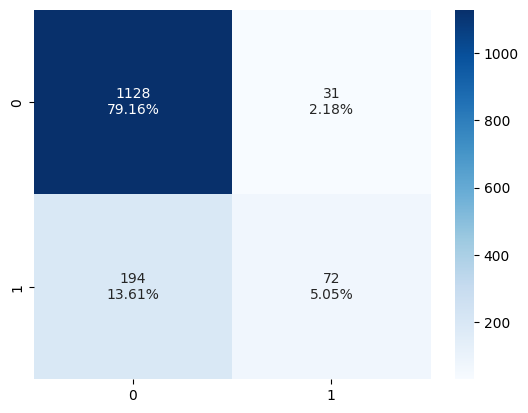


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1159
           1       0.70      0.27      0.39       266

    accuracy                           0.84      1425
   macro avg       0.78      0.62      0.65      1425
weighted avg       0.82      0.84      0.81      1425

Accuracy: 0.8421052631578947
ROC-AUC Score: 0.6219647479354122


In [48]:


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

#Predicting the values
prediction = model_lr.predict(X_test)

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction)

# Calculate the percentage for each cell
cf_matrix_percent = cf_matrix / np.sum(cf_matrix) * 100

# Create labels with both count and percentage
labels = [f"{v1}\n{v2:.2f}%" for v1, v2 in zip(cf_matrix.flatten(), cf_matrix_percent.flatten())]
labels = np.asarray(labels).reshape(cf_matrix.shape)

# Plot the heatmap
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

# Classification Report (includes Precision, Recall, F1-Score, Support)
print("\nClassification Report:")
print(classification_report(y_test, prediction))

# Accuracy
print("Accuracy:", accuracy_score(y_test, prediction))

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, prediction))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# You can plot the ROC curve using matplotlib or any other plotting library


TRAINING DATA EVALUATION

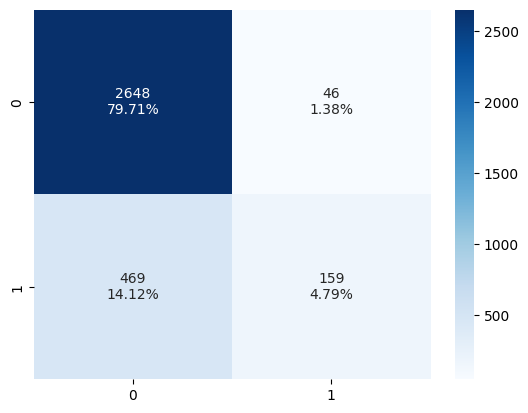


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2694
           1       0.78      0.25      0.38       628

    accuracy                           0.84      3322
   macro avg       0.81      0.62      0.65      3322
weighted avg       0.84      0.84      0.81      3322

Accuracy (Training Set): 0.8449729078868151
ROC-AUC Score (Training Set): 0.6180548659677794


In [55]:
train_predictions = model_lr.predict(X_train)

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_train, train_predictions)

# Calculate the percentage for each cell
cf_matrix_percent = cf_matrix / np.sum(cf_matrix) * 100

# Create labels with both count and percentage
labels = [f"{v1}\n{v2:.2f}%" for v1, v2 in zip(cf_matrix.flatten(), cf_matrix_percent.flatten())]
labels = np.asarray(labels).reshape(cf_matrix.shape)

# Plot the heatmap
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

# Classification Report for the training set (includes Precision, Recall, F1-Score, Support)
print("\nClassification Report (Training Set):")
print(classification_report(y_train, train_predictions))

# Accuracy for the training set
print("Accuracy (Training Set):", accuracy_score(y_train, train_predictions))

# ROC-AUC Score for the training set
print("ROC-AUC Score (Training Set):", roc_auc_score(y_train, train_predictions))

# ROC Curve for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_predictions)
# You can plot the ROC curve for the training set using matplotlib or any other plotting library

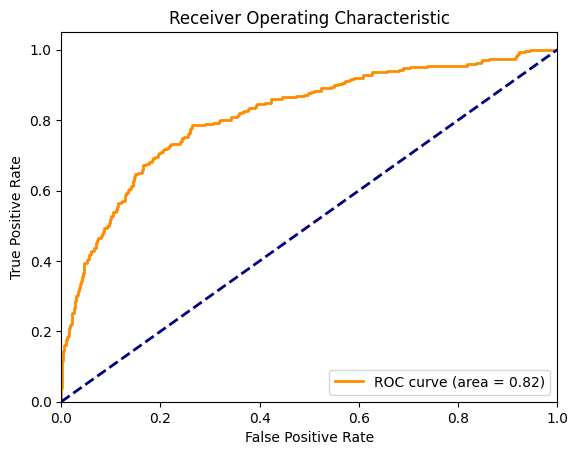

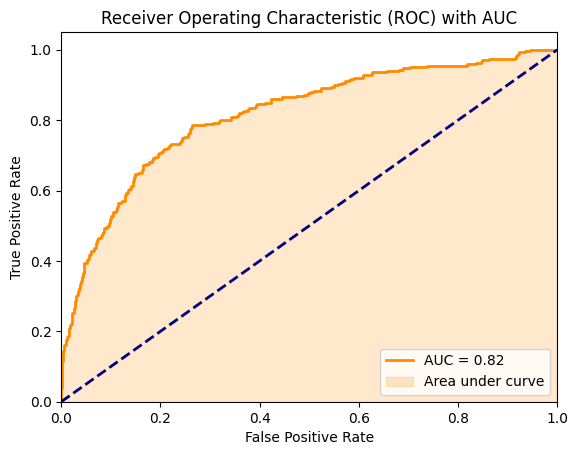

In [56]:
from sklearn.metrics import roc_curve, auc


# Predict probabilities
y_pred_proba = model_lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange', label='Area under curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) with AUC')
plt.legend(loc="lower right")
plt.show()

SO , LOGISTIC REGRESSION HAVE

* Accuracy : 0.8449729078868151

* AUC = .**82**





###DEEP NEURAL NETWORK REGRESSSION

CONVERTING THE DATA INTO TENSORFLOW FOR FASTER COMPUTATIONS OF NEURAL NETWORK

In [79]:

X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Now we can use these tensors in your TensorFlow model to do further operations


IMPORTING LIBRARIES FOR NEURAL NETWORKS

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


DEFINING THE MODEL

In [98]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_tensor.shape[1],),name="First_layer"),
    Dense(64, activation='relu',name="Second_layer"),
    Dense(32, activation='relu',name="Thrid_layer"),
    Dense(1, activation='sigmoid',name="Output_layer")
])


COMPILING THE NEURAL NETWORK MODEL

In [99]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])


TRAINING THE MODEL

In [100]:

history= model.fit(X_train_tensor, y_train_tensor, validation_split=0.20, epochs=10, batch_size=128,verbose=0)

 CHECKING THE LOSS AND ACCURACY OF THE RESULT

In [101]:

loss, accuracy = model.evaluate(X_train_tensor, y_train_tensor)
print(f'training accuracy: {accuracy}')
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

104/104 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9043
training accuracy: 0.9042745232582092
45/45 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8709
Test Loss: 0.31299540400505066
Test Accuracy: 0.870877206325531


PREDICTIONS

In [104]:
predictions = model.predict(X_test_tensor)


45/45 [==============================] - 0s 3ms/step


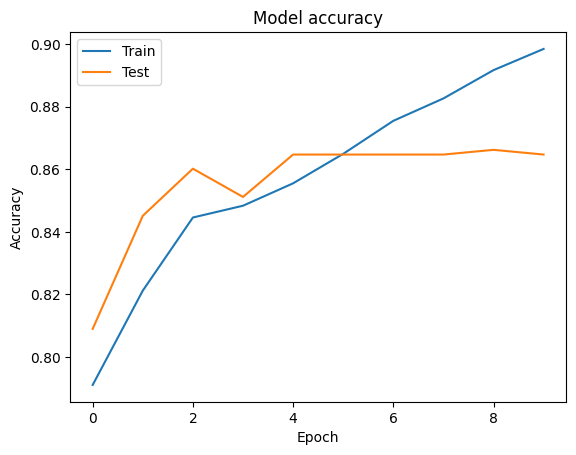

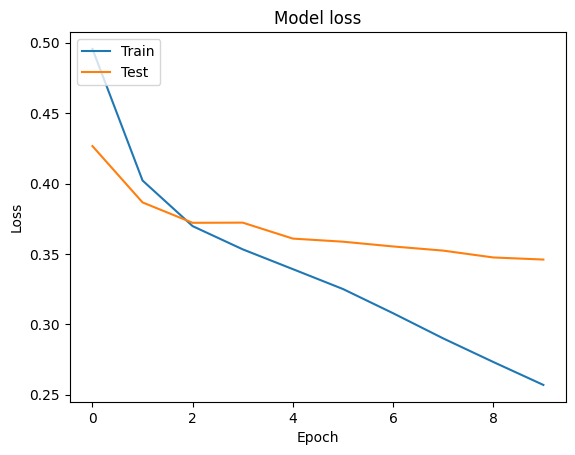

In [105]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



 PROBLEM:HERE ADAM IS GIVING ACCURACY OF 99.873% ON TRAINING DATA BUT 91.472% ON TEST DATA

### Another NN model

In [66]:
#DEFINING THE  OTHER MODEL
model_final = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],),name="First_layer"),
    Dense(64, activation='relu',name="Second_layer"),
    Dense(32, activation='relu',name="Thrid_layer"),
    Dense(1, activation='sigmoid',name="Output_layer")
])


In [67]:
#COMPILING THE  NEURAL NETWORK mode_final
model_final.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy','mse'])


In [68]:
# TRAINING THE MODEL
history= model_final.fit(X_train, y_train, validation_split=0.20, epochs=80, batch_size=128,verbose=1)

Epoch 1/80
21/21 [==============================] - 1s 23ms/step - loss: 0.6265 - accuracy: 0.7787 - mse: 0.2170 - val_loss: 0.5929 - val_accuracy: 0.8090 - val_mse: 0.2006
Epoch 2/80
21/21 [==============================] - 0s 8ms/step - loss: 0.5605 - accuracy: 0.8114 - mse: 0.1854 - val_loss: 0.5427 - val_accuracy: 0.8090 - val_mse: 0.1772
Epoch 3/80
21/21 [==============================] - 0s 8ms/step - loss: 0.5196 - accuracy: 0.8114 - mse: 0.1671 - val_loss: 0.5127 - val_accuracy: 0.8090 - val_mse: 0.1643
Epoch 4/80
21/21 [==============================] - 0s 7ms/step - loss: 0.4957 - accuracy: 0.8114 - mse: 0.1574 - val_loss: 0.4955 - val_accuracy: 0.8090 - val_mse: 0.1576
Epoch 5/80
21/21 [==============================] - 0s 7ms/step - loss: 0.4817 - accuracy: 0.8114 - mse: 0.1522 - val_loss: 0.4847 - val_accuracy: 0.8090 - val_mse: 0.1537
Epoch 6/80
21/21 [==============================] - 0s 6ms/step - loss: 0.4725 - accuracy: 0.8114 - mse: 0.1491 - val_loss: 0.4772 - val_ac

In [77]:
# CHECKING THE LOSS AND ACCURACY OF THE TRAINING RESULT
loss, accuracy,mse = model_final.evaluate(X_train_tensor, y_train_tensor)
print(f'training accuracy: {accuracy}')



104/104 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8603 - mse: 0.1050
training accuracy: 0.8603250980377197


In [76]:
# CHECKING THE LOSS AND ACCURACY OF THE TEST RESULT
test_loss, test_accuracy,test_mse = model_final.evaluate(X_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

45/45 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8498 - mse: 0.1101
Test Loss: 0.35796070098876953
Test Accuracy: 0.8498245477676392


In [75]:
predictions = model_final.predict(X_test_tensor)


45/45 [==============================] - 0s 3ms/step


In [ ]:
# Predict the probabilities of the test data
y_pred_prob_final = model_final.predict(X_test)

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_final)
roc_auc = auc(fpr, tpr)

# Print the AUC
print("AUC:", roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

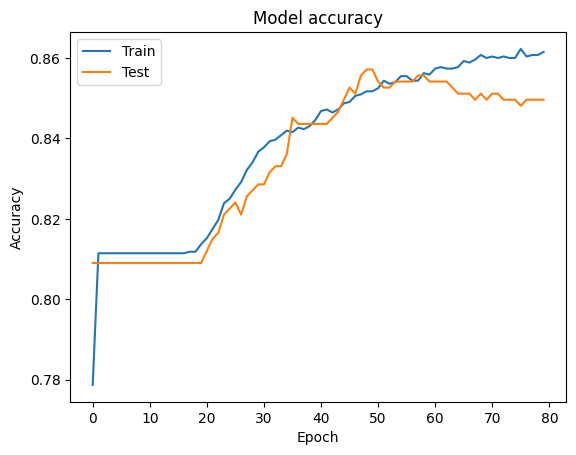

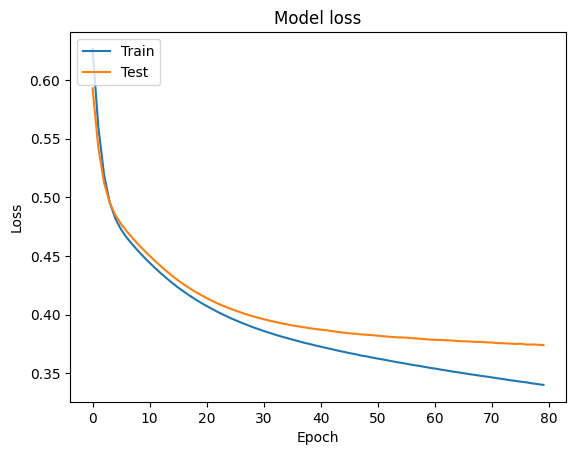

In [72]:


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [73]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Convert probabilities to binary predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print(cm)


45/45 [==============================] - 0s 2ms/step
[[1117   42]
 [  73  193]]


In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_layer (Dense)         (None, 256)               9216      
                                                                 
 Second_layer (Dense)        (None, 64)                16448     
                                                                 
 Thrid_layer (Dense)         (None, 32)                2080      
                                                                 
 Output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 27777 (108.50 KB)
Trainable params: 27777 (108.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
